In [79]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [80]:
Data=pd.read_csv("house-votes-84.csv")

In [81]:
Data.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [82]:
data=Data

In [83]:
originalColumnNames=list(data.columns)

In [84]:
Columns={}
index=0
for col in list(data.columns):
    Columns[col]="f"+str(index)
    index+=1

In [85]:
data=data.rename(columns=Columns)

In [86]:
def getLabel(Class):
    if Class=="democrat":
        return 1
    else:
        return 0

In [87]:
data["Label"]=data.f0.apply(lambda x: getLabel(x))

In [88]:
data=data.drop(columns=["f0"])

In [89]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,Label
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,0
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,0
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,1
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,1
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,1


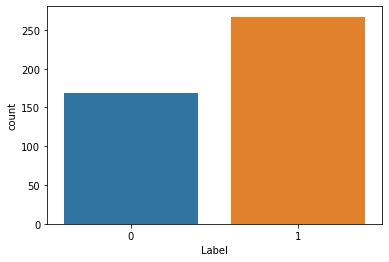

In [90]:
# republican = 0, democrat = 1 
ax = sns.countplot(x="Label", data=data)

In [91]:
len(data[data["Label"]==1])/len(data)

0.6137931034482759

### Impute "?" with most frequent

In [92]:
imputer = SimpleImputer(missing_values="?", strategy='most_frequent')

In [93]:
imputer.fit(data)

SimpleImputer(missing_values='?', strategy='most_frequent')

In [94]:
data=pd.DataFrame(imputer.transform(data), columns=data.columns)

### Impute "?" With Party Line Vote 

In [95]:
republicans=data[data["Label"]==0]
democrats=data[data["Label"]==1]

In [96]:
republicans.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,Label
0,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y,0
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y,0
7,n,y,n,y,y,y,n,n,n,n,n,n,y,y,n,y,0
8,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y,0
10,n,y,n,y,y,n,n,n,n,n,n,n,y,y,n,n,0


In [97]:
republicans.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,Label
0,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y,0
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y,0
7,n,y,n,y,y,y,n,n,n,n,n,n,y,y,n,y,0
8,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y,0
10,n,y,n,y,y,n,n,n,n,n,n,n,y,y,n,n,0


In [98]:
demImputer = SimpleImputer(missing_values="?", strategy='most_frequent')
repImputer = SimpleImputer(missing_values="?", strategy='most_frequent')

In [99]:
demImputer.fit(democrats)

SimpleImputer(missing_values='?', strategy='most_frequent')

In [100]:
repImputer.fit(republicans)

SimpleImputer(missing_values='?', strategy='most_frequent')

In [101]:
democrats=pd.DataFrame(demImputer.transform(democrats), columns=democrats.columns)

In [102]:
republicans=pd.DataFrame(repImputer.transform(republicans), columns=republicans.columns)

In [103]:
data=pd.concat([republicans, democrats], ignore_index=True)

In [104]:
data=data.sample(n=435, replace=False).reset_index()

In [105]:
data=data.drop(columns={"index"})

In [106]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,Label
0,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y,1
1,n,y,y,n,y,y,n,y,n,y,n,n,y,y,n,y,1
2,n,n,y,y,y,y,y,y,y,y,n,y,y,y,y,y,0
3,n,n,y,n,n,n,y,y,y,y,y,n,n,n,y,y,1
4,n,n,y,n,n,y,y,y,y,y,n,n,y,n,n,y,1


### Convert "y" and "n" to 1 and 0 

In [107]:
ordEncoder=OrdinalEncoder()

In [108]:
ordEncoder.fit(data)

OrdinalEncoder()

In [109]:
data=pd.DataFrame(ordEncoder.transform(data), columns=data.columns)

In [110]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,Label
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


### Train Test Split  

In [111]:
feature_columns=list(data.columns)
feature_columns.remove("Label")
X=data[feature_columns]
y=data.Label

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

### Decision Tree 

In [113]:
decisionTree=DecisionTreeClassifier(ccp_alpha=0.1) # 0.392 ccp_alpha=0.1

In [114]:
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.1)

In [115]:
y_pred=decisionTree.predict(X_test)

In [116]:
(y_pred==y_test).sum()/len(y_test)

0.9724770642201835

In [117]:
decisionTree.get_n_leaves()

2

In [118]:
decisionTree.score(X_train,y_train)-decisionTree.score(X_test,y_test)

-0.021556818821410584

In [119]:
decisionTree.feature_importances_

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Try Decision Tree with just f4 

In [120]:
data1=data[["f4", "Label"]]

In [121]:
feature_cols=list(data1.columns)
feature_cols.remove("Label")
U=data1[feature_cols]
v=data1.Label

In [122]:
U_train,U_test,v_train,v_test=train_test_split(U, v, test_size=0.25, random_state=25)

In [123]:
DT=DecisionTreeClassifier(ccp_alpha=0.1)

In [124]:
DT.fit(U_train, v_train)

DecisionTreeClassifier(ccp_alpha=0.1)

In [125]:
DT.score(U_test,v_test)

0.9724770642201835

In [126]:
DT.get_n_leaves()

2

In [127]:
DT.score(U_train,v_train)-DT.score(U_test,v_test)

-0.021556818821410584

### Random Forest 

In [128]:
ranForest=RandomForestClassifier()

In [129]:
ranForest.fit(X_train,y_train)

RandomForestClassifier()

In [130]:
rf_pred=ranForest.predict(X_test)

In [131]:
(rf_pred==y_test).sum()/len(y_test)

0.9724770642201835

In [132]:
np.arange(1,len(feature_columns))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [133]:
for number in np.arange(1,len(feature_columns)):
    RF=RandomForestClassifier(max_features=number)
    RF.fit(X_train,y_train)
    RF_pred=RF.predict(X_test)
    
    print("Max Features: {}, Accuracy: {}, Variance: {}".format(number, RF.score(X_test,y_test), RF.score(X_train,y_train)-RF.score(X_test,y_test)))

Max Features: 1, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Max Features: 2, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Max Features: 3, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Max Features: 4, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Max Features: 5, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Max Features: 6, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Max Features: 7, Accuracy: 0.963302752293578, Variance: 0.03362976304384535
Max Features: 8, Accuracy: 0.963302752293578, Variance: 0.03362976304384535
Max Features: 9, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Max Features: 10, Accuracy: 0.963302752293578, Variance: 0.03362976304384535
Max Features: 11, Accuracy: 0.963302752293578, Variance: 0.03362976304384535
Max Features: 12, Accuracy: 0.963302752293578, Variance: 0.03362976304384535
Max Features: 13, Accuracy: 0.963302752293578, Variance: 0.03362976304384535
M

In [134]:
numTrees=[5,10,20,30,40,50,75,100,125,150,200,250,300,500,800]
for number in numTrees:
    RF=RandomForestClassifier(n_estimators=number)
    RF.fit(X_train,y_train)
    RF_pred=RF.predict(X_test)
    
    print("Number of Trees: {}, Accuracy: {}, Variance: {}".format(number, RF.score(X_test,y_test), RF.score(X_train,y_train)-RF.score(X_test,y_test)))

Number of Trees: 5, Accuracy: 0.9541284403669725, Variance: 0.03666910564529746
Number of Trees: 10, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Number of Trees: 20, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Number of Trees: 30, Accuracy: 0.963302752293578, Variance: 0.03362976304384535
Number of Trees: 40, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Number of Trees: 50, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Number of Trees: 75, Accuracy: 0.963302752293578, Variance: 0.03362976304384535
Number of Trees: 100, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Number of Trees: 125, Accuracy: 0.963302752293578, Variance: 0.03362976304384535
Number of Trees: 150, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Number of Trees: 200, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Number of Trees: 250, Accuracy: 0.9724770642201835, Variance: 0.02445545111723979
Number of Trees: 300, Accur